# **Exploratory** data analysis (EDA)

**Introduction**

## **Part 1: Data Loading and Exploration**


**Task 1: Importing Libraries and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')


In [33]:
df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,3,male,34.5,0,0,7.8292,Unknown,Q,1
1,3,female,47.0,1,0,7.0000,Unknown,S,2
2,2,male,62.0,0,0,9.6875,Unknown,Q,1
3,3,male,27.0,0,0,8.6625,Unknown,S,1
4,3,female,22.0,1,1,12.2875,Unknown,S,3
5,3,male,14.0,0,0,9.2250,Unknown,S,1
6,3,female,30.0,0,0,7.6292,Unknown,Q,1
7,2,male,26.0,1,1,29.0000,Unknown,S,3
8,3,female,18.0,0,0,7.2292,Unknown,C,1
9,3,male,21.0,2,0,24.1500,Unknown,S,3


In [34]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.000000,1,0,7.2500,Unknown,S,2
1,1,1,female,38.000000,1,0,71.2833,C85,C,2
2,1,3,female,26.000000,0,0,7.9250,Unknown,S,1
3,1,1,female,35.000000,1,0,53.1000,C123,S,2
4,0,3,male,35.000000,0,0,8.0500,Unknown,S,1
5,0,3,male,29.699118,0,0,8.4583,Unknown,Q,1
6,0,1,male,54.000000,0,0,51.8625,E46,S,1
7,0,3,male,2.000000,3,1,21.0750,Unknown,S,5
8,1,3,female,27.000000,0,2,11.1333,Unknown,S,3
9,1,2,female,14.000000,1,0,30.0708,Unknown,C,2


Task 2: Basic Information and Summary Statistics

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Code and Output**

Task 3: Data Cleaning

1. Handle the missing values in the dataset:

In [7]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


2. Drop irrelevant columns

In [9]:
#drop irrelevant info
df_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [10]:
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S


In [11]:
#replace age with mean value
age_mean=df_train['Age'].mean()
df_train['Age'].fillna(age_mean,inplace=True)
df_test['Age'].fillna(age_mean,inplace=True)

<ipython-input-11-2b75b908cc41>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(age_mean,inplace=True)
<ipython-input-11-2b75b908cc41>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [12]:
embarked_counts = Counter(df_train['Embarked'])
print(embarked_counts)

most_frequent_embarked, count = embarked_counts.most_common(1)[0]
print(most_frequent_embarked,count)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})
S 644


In [13]:
# Fill NaN values with the most frequent embarked value
df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)
df_test['Embarked'].fillna(most_frequent_embarked, inplace=True)

<ipython-input-13-59da6394c54e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)
<ipython-input-13-59da6394c54e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [14]:
df_train['Cabin'].fillna('Unknown',inplace=True)
df_test['Cabin'].fillna('Unknown',inplace=True)

<ipython-input-14-a475e179e81b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Cabin'].fillna('Unknown',inplace=True)
<ipython-input-14-a475e179e81b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [15]:
#replace age with mean value
fare_mean=df_test['Fare'].mean()
df_test['Fare'].fillna(fare_mean,inplace=True)


<ipython-input-15-8e26ea4c1ed5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(fare_mean,inplace=True)


In [16]:
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [17]:
df_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [18]:
df_train.head(2)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [19]:
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,Unknown,Q
1,3,female,47.0,1,0,7.0000,Unknown,S


# **Part 2: Exploratory Data Analysis (EDA)**

**Task 4: Univariate Analysis**

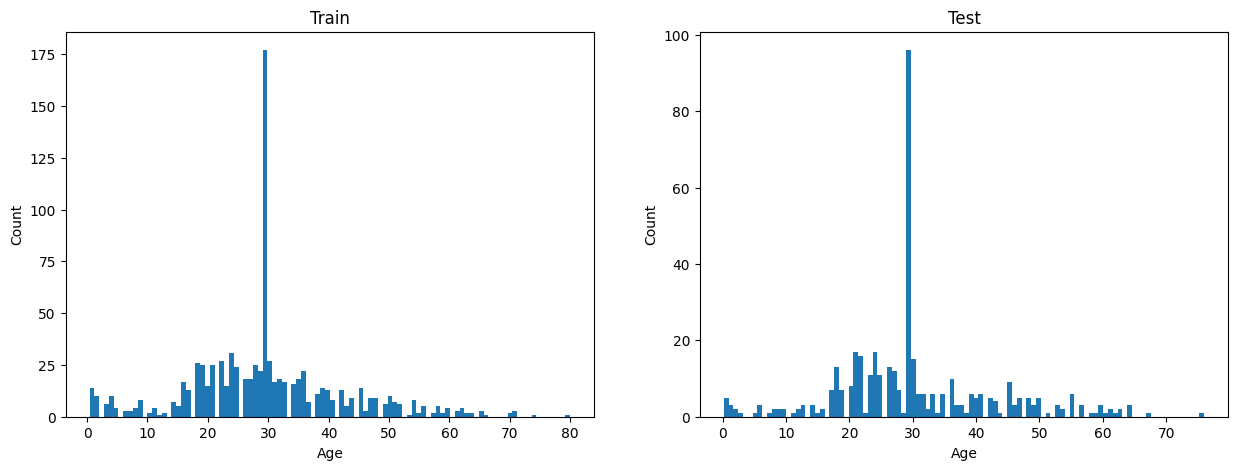

In [20]:
#Age: Create a histogram to display the distribution of passenger ages.
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].hist(df_train['Age'],bins=100)
axes[0].set_title('Train')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')


axes[1].hist(df_test['Age'],bins=100)
axes[1].set_title('Test')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64


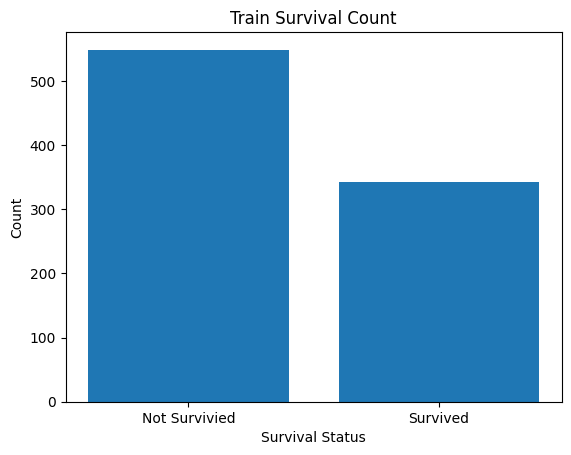

In [36]:
#Survived: Create a bar plot showing the count of survivors (1) and non-survivors (0).

# Calculate the count of survivors and non-survivors
survived_counts_train = df_train['Survived'].value_counts() # return unqiue values and its occurances
print(survived_counts_train)
# Create the bar plot

plt.bar(survived_counts_train.index, survived_counts_train.values)  # Provide both x and height

# Set labels and title for clarity
plt.xticks([0, 1],['Not Survivied','Survived'])  # Set x-axis ticks for 0 and 1 (not survived/survived) respectively
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Train Survival Count')



plt.show()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


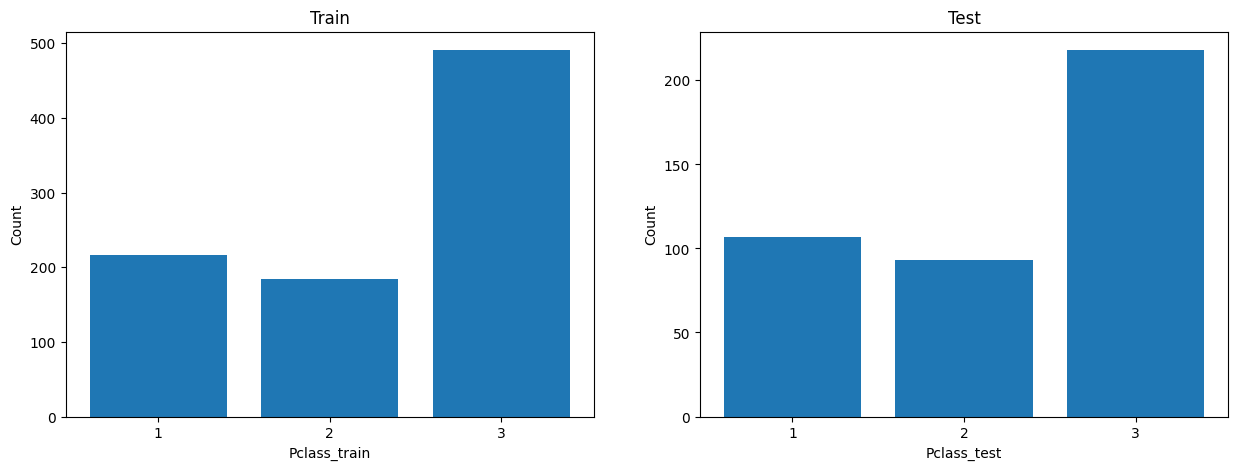

In [37]:
#Pclass: Show the count of passengers in each class using a bar chart.

pclass_counts_train = df_train['Pclass'].value_counts() # unique value, count
print(pclass_counts_train )
pclass_counts_test = df_test['Pclass'].value_counts() # unique value, count

fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].bar(pclass_counts_train.index,pclass_counts_train.values)
axes[0].set_xticks(pclass_counts_train.index)
axes[0].set_title('Train')
axes[0].set_xlabel('Pclass_train')
axes[0].set_ylabel('Count')

axes[1].bar(pclass_counts_test.index,pclass_counts_test.values)
axes[1].set_xticks(pclass_counts_train.index)
axes[1].set_title('Test')
axes[1].set_xlabel('Pclass_test')
axes[1].set_ylabel('Count')

plt.show()

Task 5: Bivariate Analysis

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64


Text(0, 0.5, 'Count')

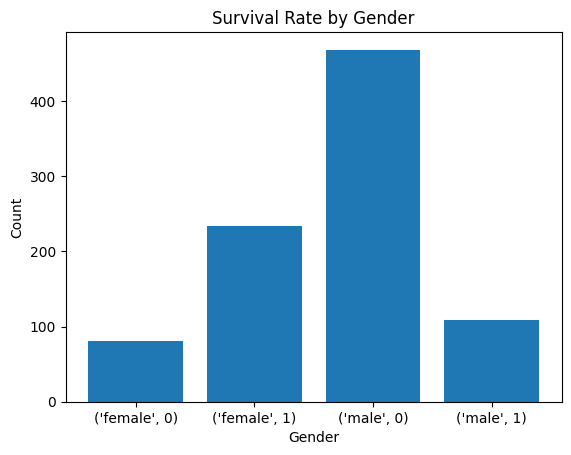

In [41]:
#Task 5: Bivariate Analysis
#Analyze the relationships between two variables:
#1. Survival Rate by Gender: Create a bar plot to compare the survival rates of male and female passengers.

#groupby statement used
count_=df_train.groupby(['Sex','Survived'])['Sex'].count()

print(count_)
x_labels = [str(idx) for idx in count_.index] # Convert tuples to strings

plt.bar(x_labels,count_.values)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')



Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64


Text(0, 0.5, 'Count')

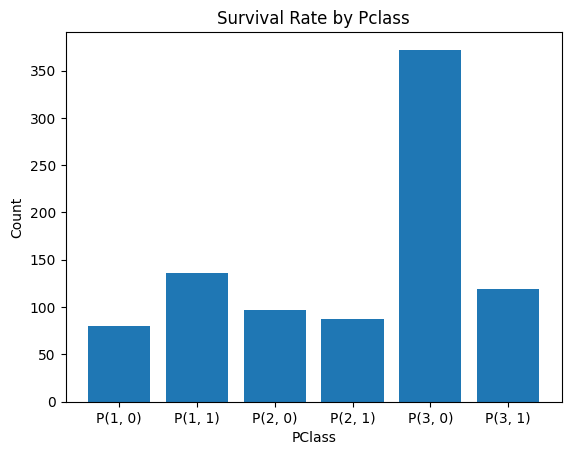

In [46]:
#2. Survival Rate by Passenger Class:
#Use a bar chart to show the survival rates for each passenger class (Pclass).

pclass=df_train.groupby(['Pclass','Survived'])['Pclass'].count()

print(pclass)
x_labels = [str('P')+str(idx) for idx in pclass.index] # Convert tuples to strings


plt.bar(x_labels,pclass.values)
plt.title('Survival Rate by Pclass')
plt.xlabel('PClass')
plt.ylabel('Count')


#p(1,0)>>> represent it belong to class 1 and 0 mean not survive

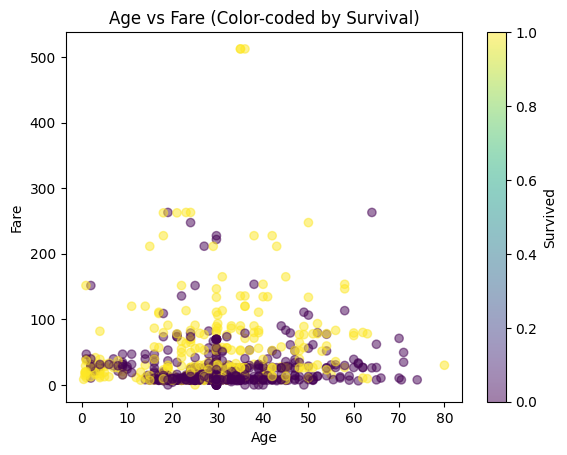

In [25]:
# Color-code by Survival
plt.scatter(df_train['Age'], df_train['Fare'],c=df_train['Survived'],cmap='viridis', alpha=0.5)
plt.title('Age vs Fare (Color-coded by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived')  # Add color bar for reference
plt.show()


**Task 6: Correlation Analysis**

Text(0.5, 1.0, 'Correlation Matrix')

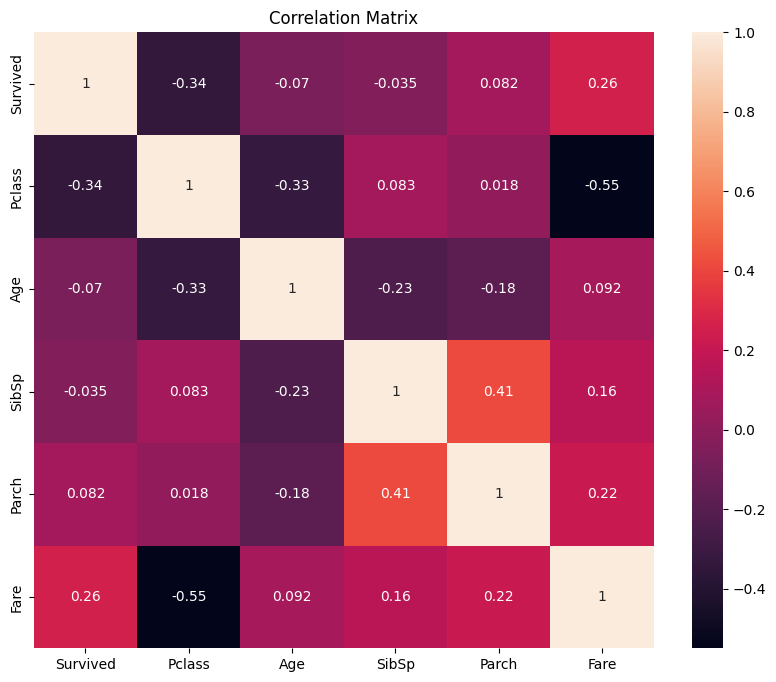

In [26]:
#Compute the correlation matrix for the numerical columns in the dataset.
#Use a heatmap (Seaborn) to visualize the correlations.
#Identify which variables are most correlated with Survived.

correlation_matrix=df_train.corr(numeric_only=True)

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')

#columns values near to 1 represent more dependency/ corelation with each other


# **Part 3: Data Visualization and Insights**

**Task 7: Advanced Visualization**

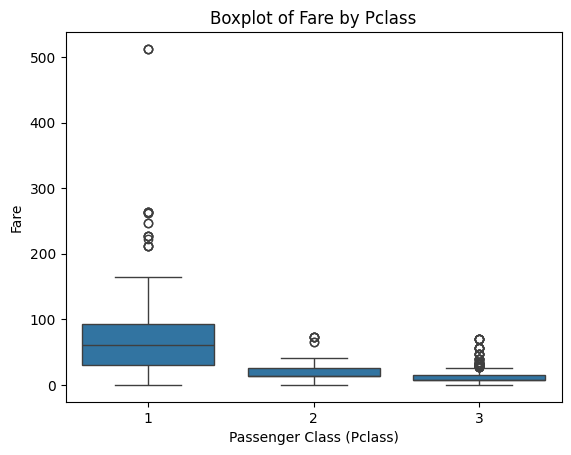

In [27]:
#Task 7: Advanced Visualization

#Create a boxplot to analyze how Fare varies for each Pclass.
#Create a violin plot to show the distribution of Age for male and female passengers.
#Show a pair plot of the numerical features (Age, Fare, Pclass, etc.) using Seaborn.


#1.
# Boxplot
sns.boxplot(x='Pclass', y='Fare', data=df_train)
plt.title('Boxplot of Fare by Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.show()

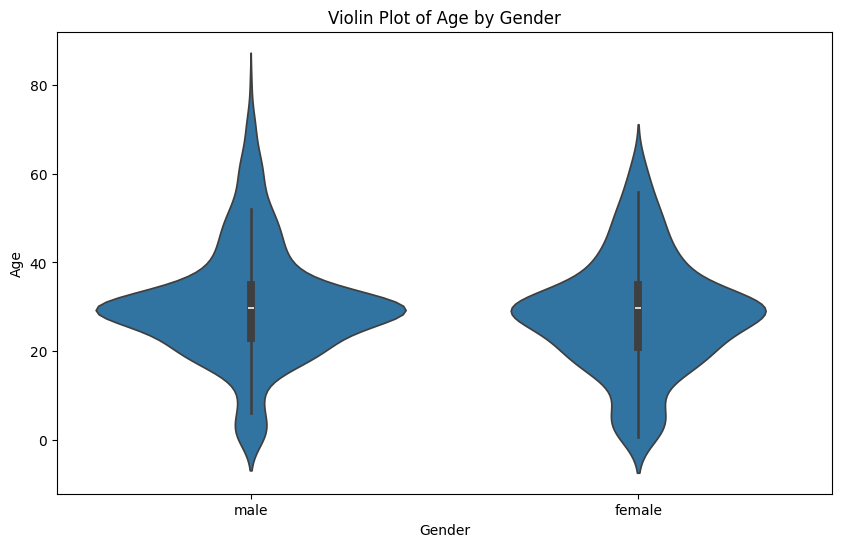

In [28]:
#Create a violin plot to show the distribution of Age for male and female passengers.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=df_train)
plt.title('Violin Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

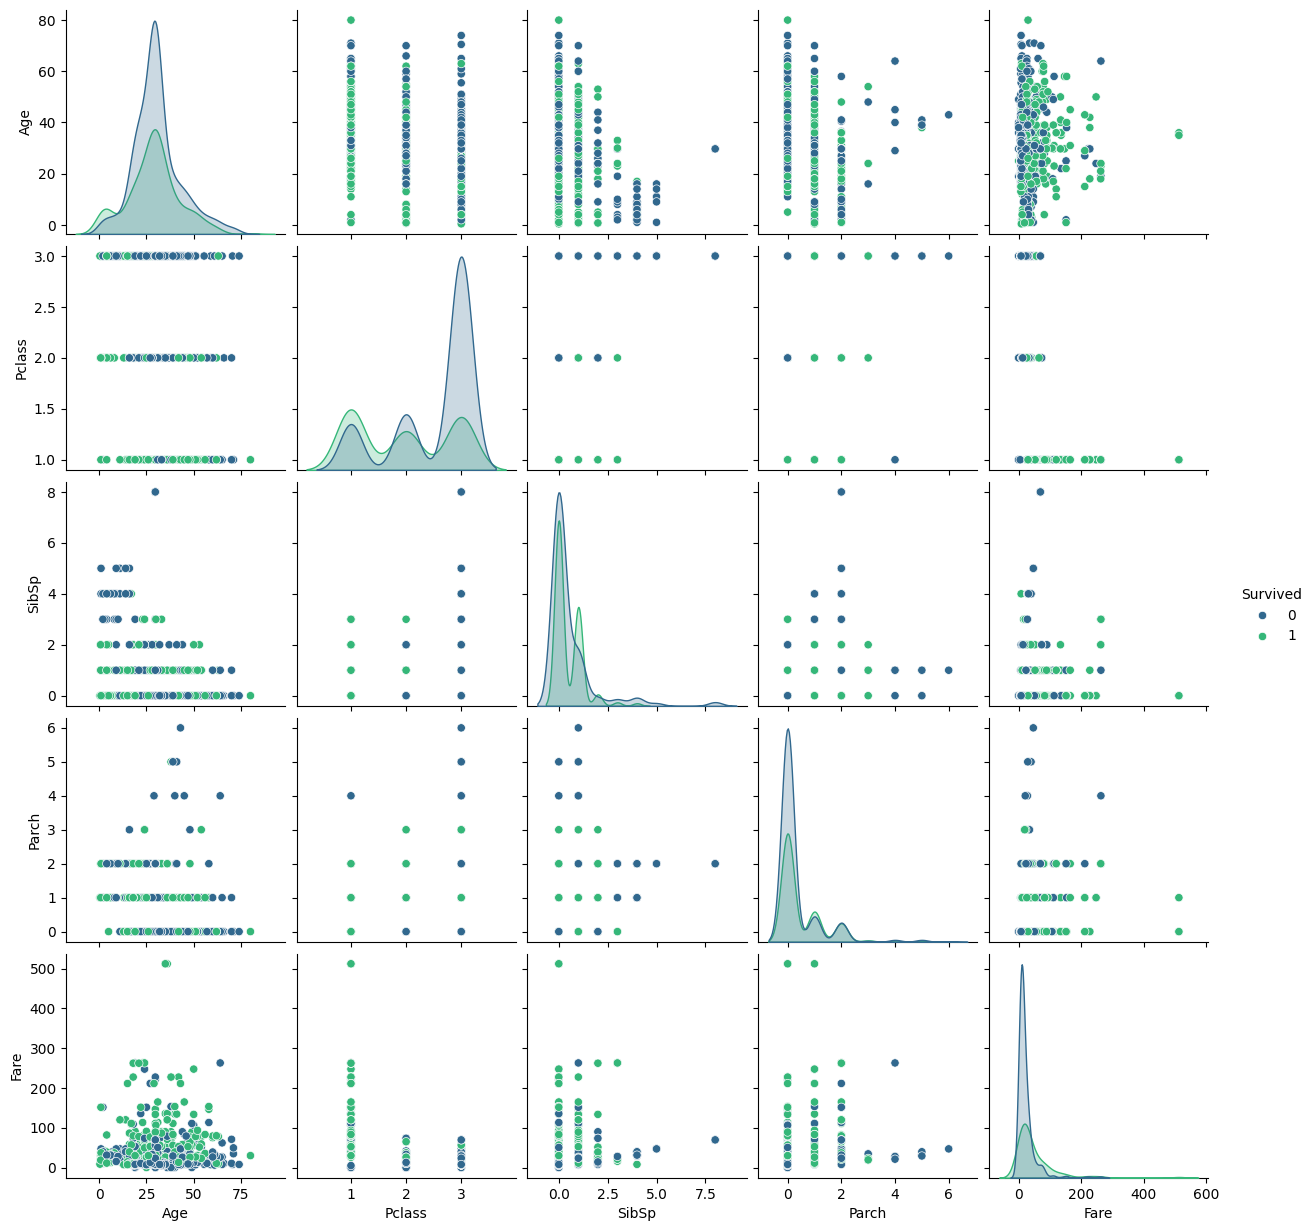

In [29]:
#Show a pair plot of the numerical features (Age, Fare, Pclass, etc.) using Seaborn.

sns.pairplot(df_train[['Survived','Age','Pclass','SibSp','Parch','Fare']],hue='Survived', palette='viridis') #hue='Survived', palette='Set1' used for different color combo
plt.show()

# **Insights and Conclusions**

**Task 8: Insights and Conclusions**

In [30]:
#1. Write a summary of 5 key insights that you discovered during the exploratory data analysis.

#For example:
#"Females had a higher survival rate compared to males."
#"Passengers in first class had a higher survival rate than those in third class."

#2. Suggest 2 potential next steps that could be performed, such as
# building a predictive model or further data cleaning.







**Task 9:**

In [31]:
#Task 9:
#Write a Python script to create a new feature in the dataset called FamilySize,
# defined as:

#FamilySize = SibSp + Parch + 1


df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1







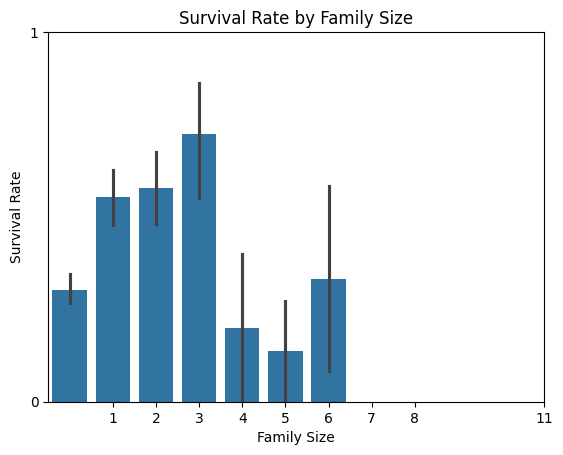

In [32]:
#Analyze how FamilySize influences the survival rate using a bar plot.


sns.barplot(x='FamilySize',y='Survived',data=df_train)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.xticks(ticks=df_train['FamilySize'].unique(), labels=df_train['FamilySize'].unique())  #take a unique values as ticks
plt.ylabel('Survival Rate')
plt.yticks(ticks=df_train['Survived'].unique(), labels=df_train['Survived'].unique())
plt.show()
